In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('/content/Mall_CustomersSegmentation.xls')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.shape

(200, 5)

In [ ]:
labelEncoder = LabelEncoder()
data['Gender']= labelEncoder.fit_transform(data['Gender'])

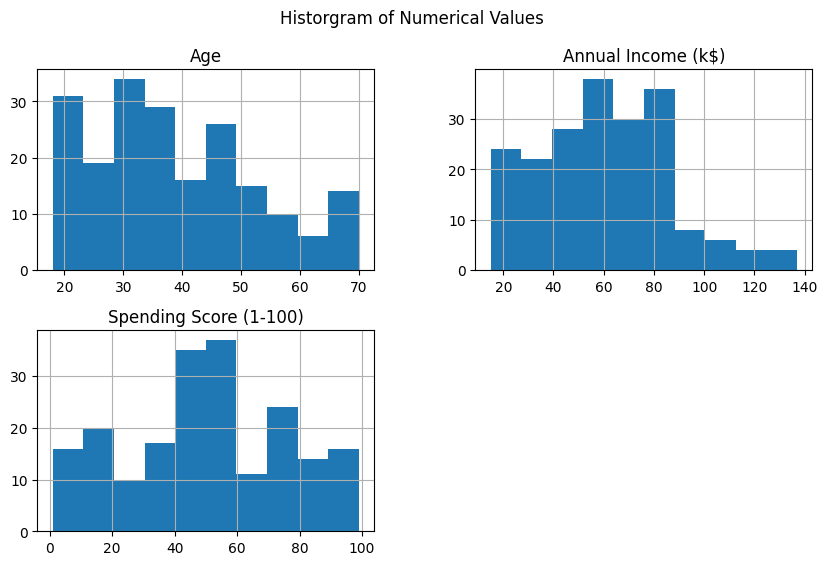

In [ ]:
data[['Age','Annual Income (k$)' ,'Spending Score (1-100)']].hist(bins=10, figsize=(10,6))
plt.suptitle("Historgram of Numerical Values")
plt.show()

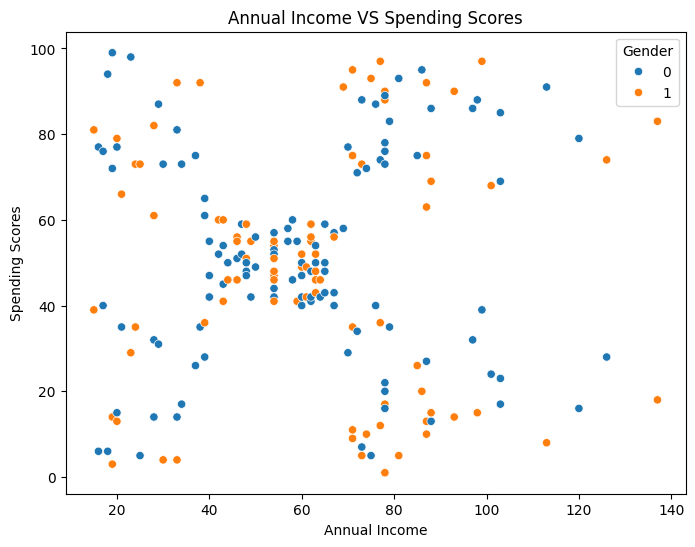

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title("Annual Income VS Spending Scores")
plt.xlabel("Annual Income")
plt.ylabel('Spending Scores')
plt.show()

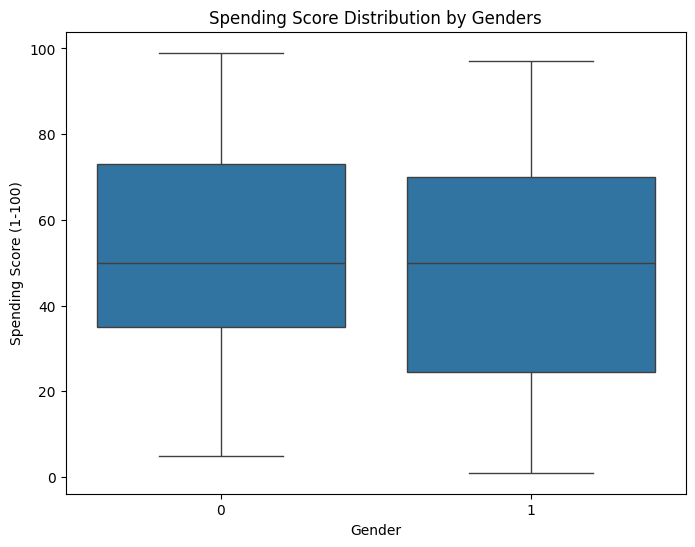

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Spending Score (1-100)',data=data)
plt.title('Spending Score Distribution by Genders')
plt.show()

In [ ]:
genders= data['Gender'].value_counts()
genders

,count
Gender,
0,112
1,88


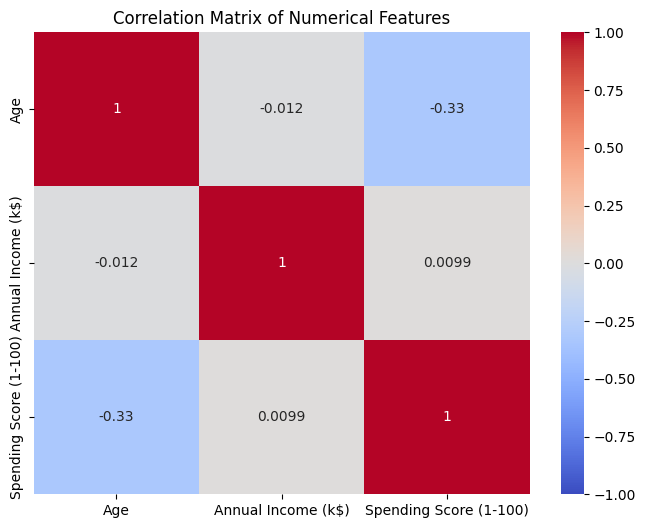

In [ ]:
# Calculate correlation matrix
corr_matrix = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
x= data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

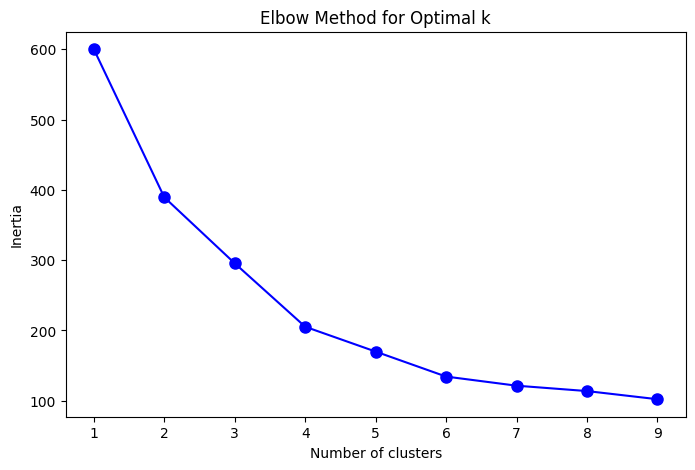

In [ ]:
# Using the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


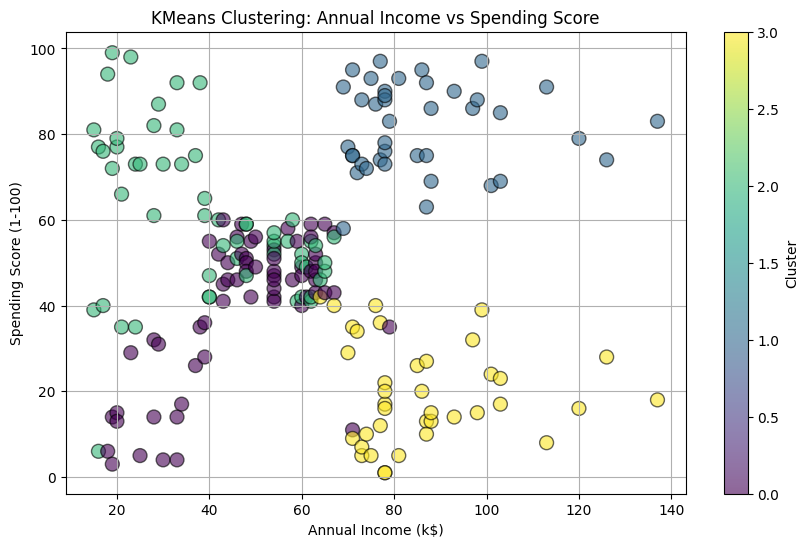

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(x_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
            c=data['Cluster'], cmap='viridis', s=100, alpha=0.6, edgecolors='k')

# Add titles and labels
plt.title('KMeans Clustering: Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()